## Handling Missing Value - Mode Categorical data 
    Mode, also known as Most Frequently Imputation or Frequent Category Imputation, is a simple data imputation technique used to handle missing values in a dataset.
    
     - Mode imputation involves replacing missing data points in a particular feature (column) with the mode of the non-missing values in that same feature. The mode is the value that appears most often in a dataset.
       * It is most suitable and commonly used for categorical data (nominal or ordinal), 
         where mean or median are not applicable.
       * It can also be used for numerical data, though mean or median are often preferred 
         unless the data is discrete and heavily concentrated around a single value.
    
     - If Column has null value equal to 5% use most_frquently or mode 
     - If null values is greater than 5% use new category ' missing '

### Import Libraries

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

### load dataset

In [99]:
data = pd.read_csv("train.csv",usecols=['GarageQual','SalePrice','FireplaceQu'])
data.head(3)

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500


### Get complete information about dataset

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FireplaceQu  770 non-null    object
 1   GarageQual   1379 non-null   object
 2   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


### Check for null values

In [103]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

### Count of Catagories Before Filling NaN values 

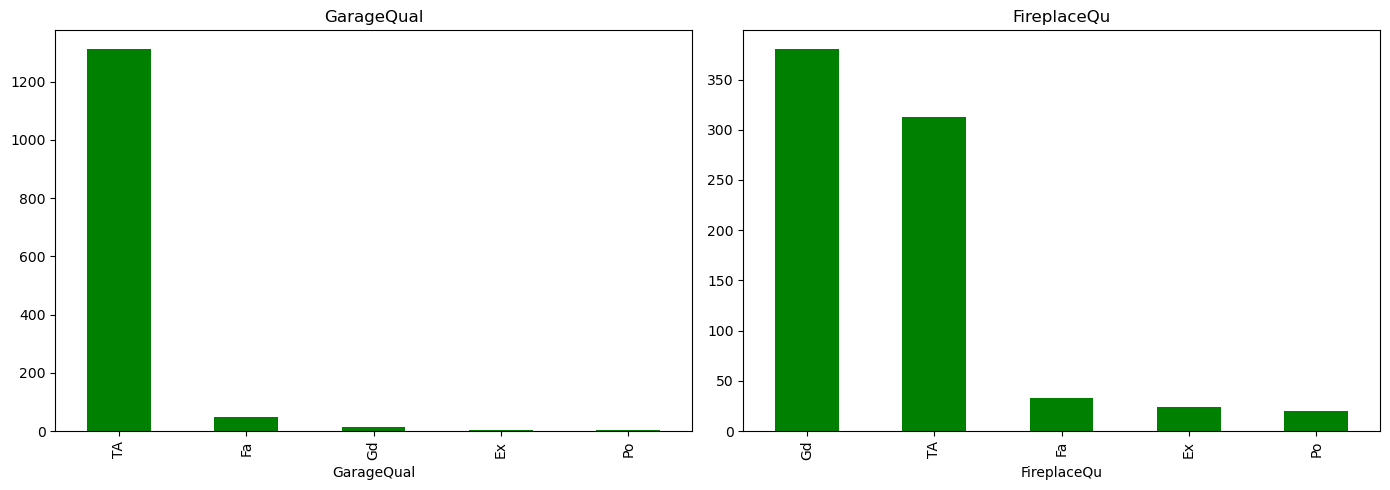

In [105]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
data['GarageQual'].value_counts().plot(kind='bar',color='green')
plt.title("GarageQual")

plt.subplot(1,2,2)
data['FireplaceQu'].value_counts().plot(kind='bar',color='green')
plt.title("FireplaceQu")
plt.tight_layout()
plt.show()

In [106]:
print("Mode of FireplaceQu ::",data['FireplaceQu'].mode())
print("Mode of GarageQual ::",data['GarageQual'].mode())

Mode of FireplaceQu :: 0    Gd
Name: FireplaceQu, dtype: object
Mode of GarageQual :: 0    TA
Name: GarageQual, dtype: object


### Check Distribution of GarageQual Catrgories [ 'TA' , NaN ] and FireplaceQu Categories [ 'Gd' , 'NaN']

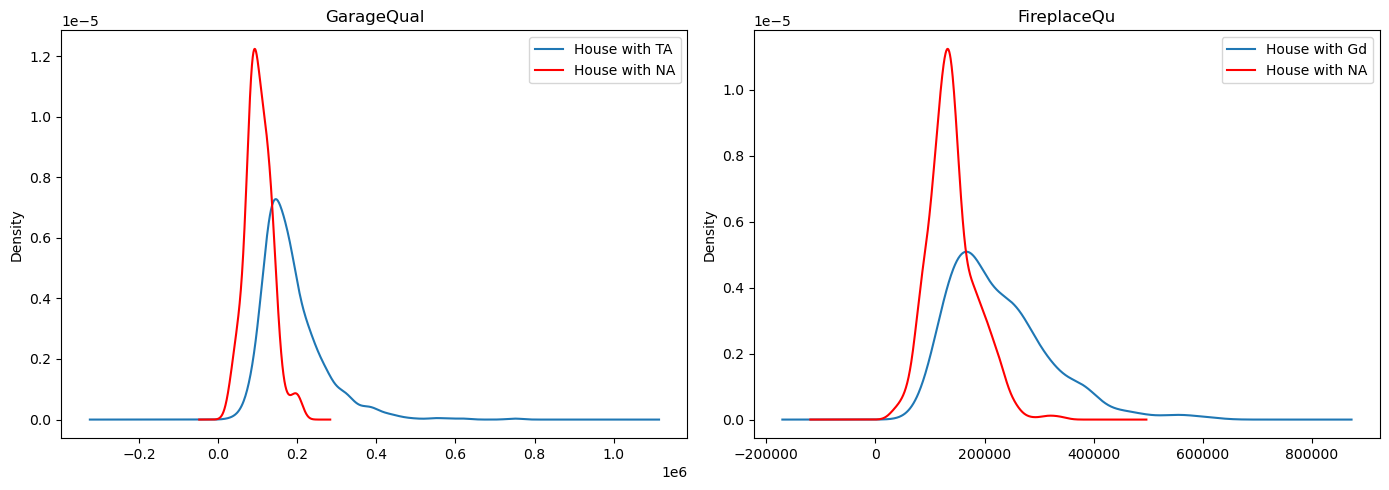

In [108]:
plt.figure(figsize=(14,5))
plt.subplot(121)
data[data['GarageQual']=='TA']['SalePrice'].plot(kind='kde',label='House with TA')
data[data['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',color='red',label='House with NA')
plt.legend(loc='best')
plt.title("GarageQual")

plt.subplot(122)
data[data['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',label='House with Gd')
data[data['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', color='red',label='House with NA')
plt.legend(loc='best')
plt.title("FireplaceQu")
plt.tight_layout()
plt.show()

### Filling NaN Values with mode of GarageQual and FireplaceQu

In [110]:
temp = data[data['GarageQual']=='TA']['SalePrice']
temp1 = data[data['FireplaceQu']=='Gd']['SalePrice']
data['FireplaceQu'].fillna(data['FireplaceQu'].mode(),inplace = True)
data['GarageQual'].fillna(data['GarageQual'].mode(),inplace=True)

### Count of Categories After Filling Nan Values 

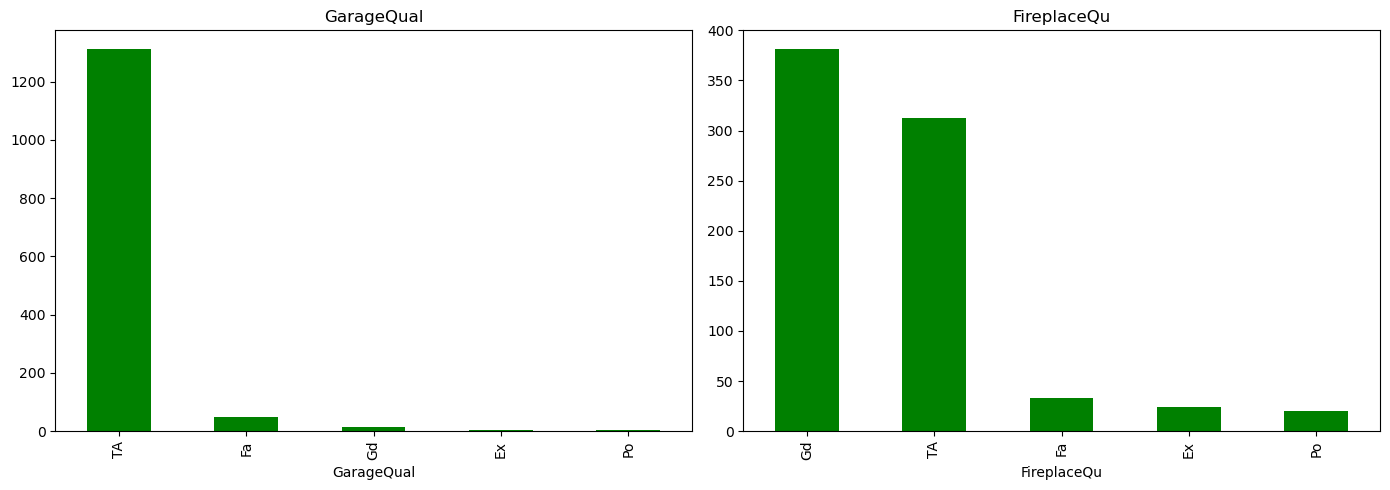

In [112]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
data['GarageQual'].value_counts().plot(kind='bar',color='green')
plt.title("GarageQual")

plt.subplot(1,2,2)
data['FireplaceQu'].value_counts().plot(kind='bar',color='green')
plt.title("FireplaceQu")
plt.tight_layout()
plt.show()

### Check Distribution For Original and Imputed variable 

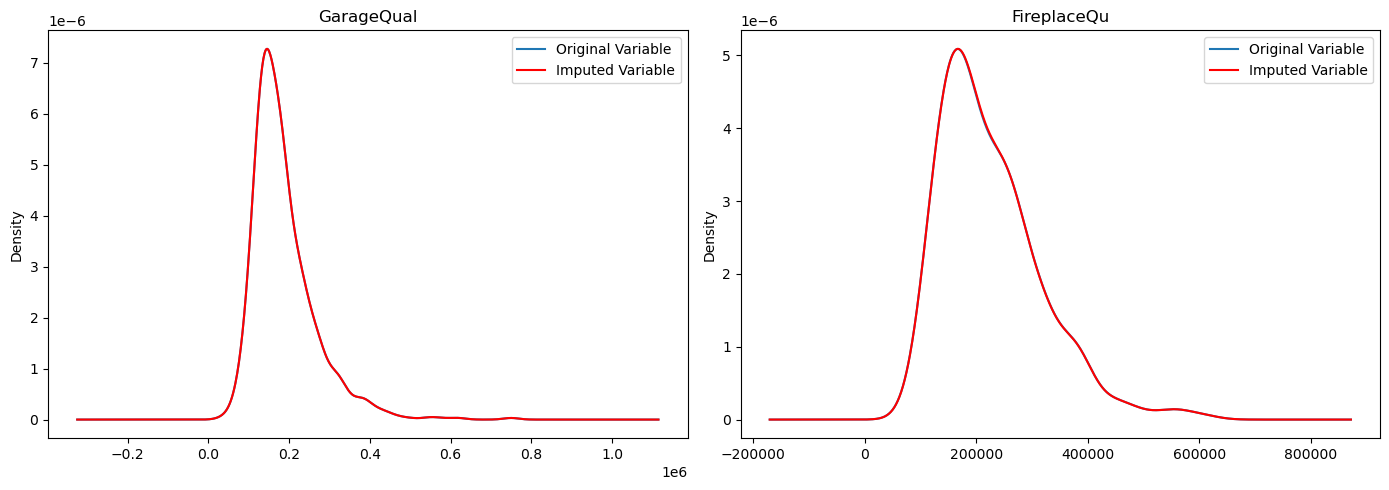

In [114]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
temp.plot(kind='kde', label = 'Original Variable')
data[data['GarageQual']=='TA']['SalePrice'].plot(kind='kde',color='red',label='Imputed Variable')
plt.legend(loc = 'best')
plt.title('GarageQual')

plt.subplot(1,2,2)
temp1.plot(kind='kde',label ='Original Variable')
data[data['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',color='red',label='Imputed Variable')
plt.legend(loc='best')
plt.title('FireplaceQu')
plt.tight_layout()
plt.show()

### Using Sklearn SimpleImputer()

In [116]:
imputer = SimpleImputer(strategy='most_frequent')

In [117]:
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [118]:
X_train.isnull().sum()

FireplaceQu    546
GarageQual      64
dtype: int64

In [119]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [120]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

In [121]:
X_train

array([['Gd', 'TA'],
       ['TA', 'TA'],
       ['Gd', 'TA'],
       ...,
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['TA', 'TA']], dtype=object)

In [122]:
X_train = pd.DataFrame(X_train,columns=['FireplaceQu','GarageQual'])
X_train.head()

,FireplaceQu,GarageQual
0,Gd,TA
1,TA,TA
2,Gd,TA
3,TA,TA
4,Gd,TA


In [123]:
X_train.isnull().sum()

FireplaceQu    0
GarageQual     0
dtype: int64